## 평가

### 분류의 성능 평가 지표
* 정확도 ( accuarcy )
* 오차행렬 ( Confusion matrix )
* 정밀도 ( Precision )
* 재현율 ( Recall )
* F1 스코어
* ROC AUC

#### 정확도
실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

In [1]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X , y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred
    

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
titanic_df = pd.read_csv('train.csv')

In [9]:
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived",axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도 : {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도 : 0.7877


데이터의 구성에 따라 정확도 결과는 높은 수치가 나올 수 있지만, 불균형한 레이블 값 분포에서 머신러닝 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니기 때문에 정확도를 평가 지표로 사용할 때는 신중해야합니다.

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [11]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [12]:
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


0으로만 예측해도 MyFakeClassifier의 정확도가 90%가 나오는 것은 잘못된 결과이며 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안됩니다.

#### 오차 행렬
이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 예측 오류가 발생하는지를 나타내주는 지표.  
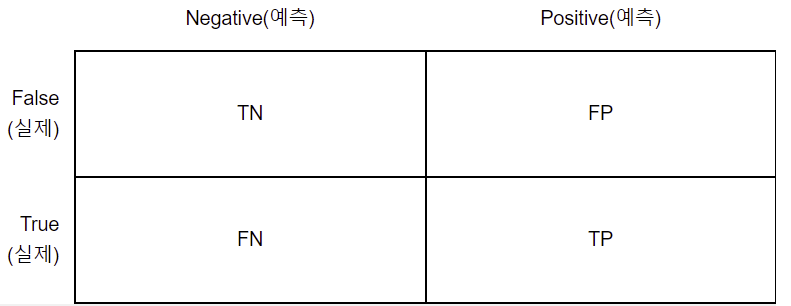
* TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
* FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
* FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
* TP : 예측값을 Positive 값 1로 예측했는데 실제 값도 Positive 값 1

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

#### 정밀도와 재현율
정밀도 =  TP/( FP + TP ) : 예측을 positive로 한 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율  
재현율 =  TP/( FN + TP ) : 실제값을 positive인 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율  
( 재현율 = 민감도 = TPR )

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print("오차행렬")
    print(confusion)
    print("정확도{0:.4f}, 정밀도{1:.4f}, 재현율{2:.4f}".format(accuracy, precision, recall))

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=131)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test,pred)

오차행렬
[[86 17]
 [29 47]]
정확도0.7430, 정밀도0.7344, 재현율0.6184


C:\Users\SANGMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### 정밀도/ 재현율 트레이드오프
분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다. 하지만 정밀도와 재현율은 서로 트레이드오프 관계가 존재합니다.

In [25]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.74022782 0.25977218]
 [0.40900736 0.59099264]
 [0.7890869  0.2109131 ]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.74022782 0.25977218 0.        ]
 [0.40900736 0.59099264 1.        ]
 [0.7890869  0.2109131  0.        ]]


In [26]:
predict_proba_result = np.concatenate([predict_proba,pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',predict_proba_result[:3])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.74022782 0.25977218 0.        ]
 [0.40900736 0.59099264 1.        ]
 [0.7890869  0.2109131  0.        ]]


사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba( )를 제공합니다.  
학습이 완료된 사이킷런 Classifier객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스의 예측 확률 결과를 반환합니다.  
* 개별 클래스의 예측 확률을 ndarray m * n 형태로 반환.  
  
predict( ) 메서드의 결과 비교에서도 나타나듯이, 두 개의 칼럼 중에서 더 큰 확률 값으로 predict( )메서드가 최종 예측하고 있습니다.

**Binarizer 활용**

In [27]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있습니다.

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [28]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[86 17]
 [29 47]]
정확도0.7430, 정밀도0.7344, 재현율0.6184


In [31]:
from sklearn.preprocessing import Binarizer

threshold = 0.35

pred_proba_1 = predict_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=threshold).fit(pred_proba_1)
pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, pred)

오차행렬
[[77 26]
 [26 50]]
정확도0.7095, 정밀도0.6579, 재현율0.6579


임계값을 0.5에서 0.35로 낮추게되면 정확도와 정밀도는 떨어지지만 재현율을 높아지는 경향을 보입니다. 이는 임계값은 positive 예측값을 결정하는 확률의 기준이 되는데,  
이를 낮추게되면 positive로 예측하기가 수월해지기 때문입니다.  
TP는 47에서 50으로 늘었고 FN이 29에서 26으로 낮아졌으며, 그에 따라 재현율이 0.61에서 0.65로 좋아졌습니다.  


In [34]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차행렬
[[79 24]
 [29 47]]
정확도0.7039, 정밀도0.6620, 재현율0.6184
임곗값: 0.45
오차행렬
[[83 20]
 [29 47]]
정확도0.7263, 정밀도0.7015, 재현율0.6184
임곗값: 0.5
오차행렬
[[86 17]
 [29 47]]
정확도0.7430, 정밀도0.7344, 재현율0.6184
임곗값: 0.55
오차행렬
[[90 13]
 [29 47]]
정확도0.7654, 정밀도0.7833, 재현율0.6184
임곗값: 0.6
오차행렬
[[95  8]
 [35 41]]
정확도0.7598, 정밀도0.8367, 재현율0.5395
